# Homework 9: Mediation & Power Analyses

This homework assignment is designed to give you practice with mediation, and with using Monte Carlo methods to conduct power analyses via simulation. You won't need to load in any data for this homework.

---
# Simulating data (2 points)


In this homework, we're going to simulate the relationship between age, word reading experience, and reading comprehension skill. Older children tend to be better at reading comprehension tasks, but this isn't just an inherent part of getting older. It's a combination of gaining more experience with reading, oral language skills, and executive functions development. In this homework, though, we're going to simplify this relationship down to a direct effect of age on reading comprehension (since improvements in oral language skills and executive functions are more guaranteed as children age than reading practice is), and a mediation of word reading experience.

In graphical form: 
![picture](https://drive.google.com/uc?id=1wdm9xuiJhBJor99-9GnicO2_rzkGWtfN)

Writing the relationship out formally: 

$$x = \beta_{xa} a + \beta_{x0} + \epsilon_{x}$$

$$c = \beta_{ca} a + \beta_{cx} x + \beta_{c0} + \epsilon_c$$



$c$ is reading comprehension, $x$ is word reading experience, and $a$ is age. $\beta_{c0}$ and $\beta_{x0}$ are intercept terms for their respective formulas, and $\epsilon_{c}$ and $\epsilon_{x}$ are gaussian noise terms. We'll start by writing a function, `simulate_data`, that can simulate this relationship. The input values are set and the function structure is provided below. Complete the function such that it takes in those input variables and generates $age$, $x$, and $c$ values. Use `runif()` to generate ages. Use `rnorm()` to generate the noise terms. 

In [4]:
sample_size = 100 # How many children in data set? 
age_lo = 80     # minimum age, in months
age_hi = 200    # maximum age, in months
beta_xa = 0.5   # amount by which experience changes for increase of one month in age
beta_x0 = -5    # amount of experience when age = 0 (not interpretable, since minimum age for this data is 80 months)
sd_x = 50       # standard dev of gaussian noise term, epsilon_x
beta_ca = 0.8   # amount that comprehension score improves for every increase of one unit in age
beta_cx = 3     # amount that comprehension score improves for every increase of one unit in reading experience
beta_c0 = 10    # comprehension score when reading experience is 0. 
sd_c = 85      # standard dev of gaussian noise term, epsilon_c

simulate_data <- function(sample_size, age_lo, age_hi, beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c) {
    # WRITE YOUR CODE HERE
    age<- runif(n=sample_size,min=age_lo,max=age_hi)
    epsilon_x <- rnorm(sample_size,0,sd_x)
    x = beta_xa*age + beta_x0 +epsilon_x
    epsilon_c <- rnorm(sample_size,0,sd_c)
    c = beta_ca*age + beta_cx*x + beta_c0 + epsilon_c
    return(data.frame(age=age,x=x,c=c))
}

dat <- simulate_data(sample_size, age_lo, age_hi, beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c)
head(dat)

,age,x,c
,<dbl>,<dbl>,<dbl>
1,182.76463,111.424673,629.04707
2,81.32011,-20.885461,87.64028
3,166.51731,74.960300,275.34123
4,88.45701,48.753397,132.19789
5,173.64212,37.429045,281.49991
6,148.70115,-4.998459,86.22618


# Visualizing Data (1 point)

Load the `tidyverse` library.

In [8]:
require(tidyverse)

Plot the relationship between age and reading comprehension. 

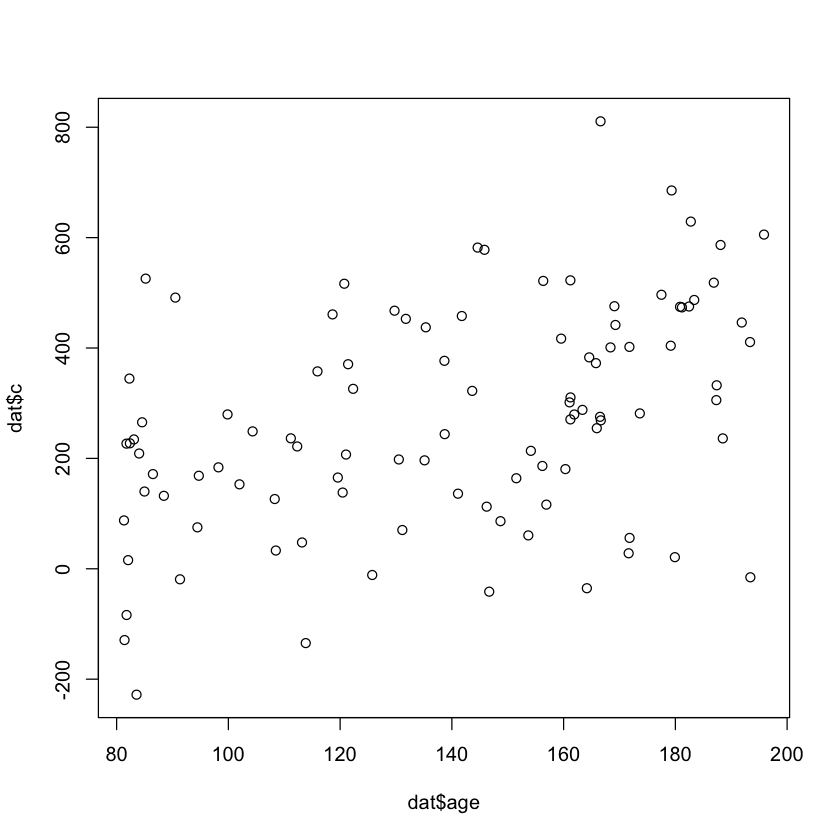

In [5]:
# WRITE YOUR CODE HERE
plot(dat$age,dat$c)

Plot the relationship between reading experience, age, and reading comprehension.

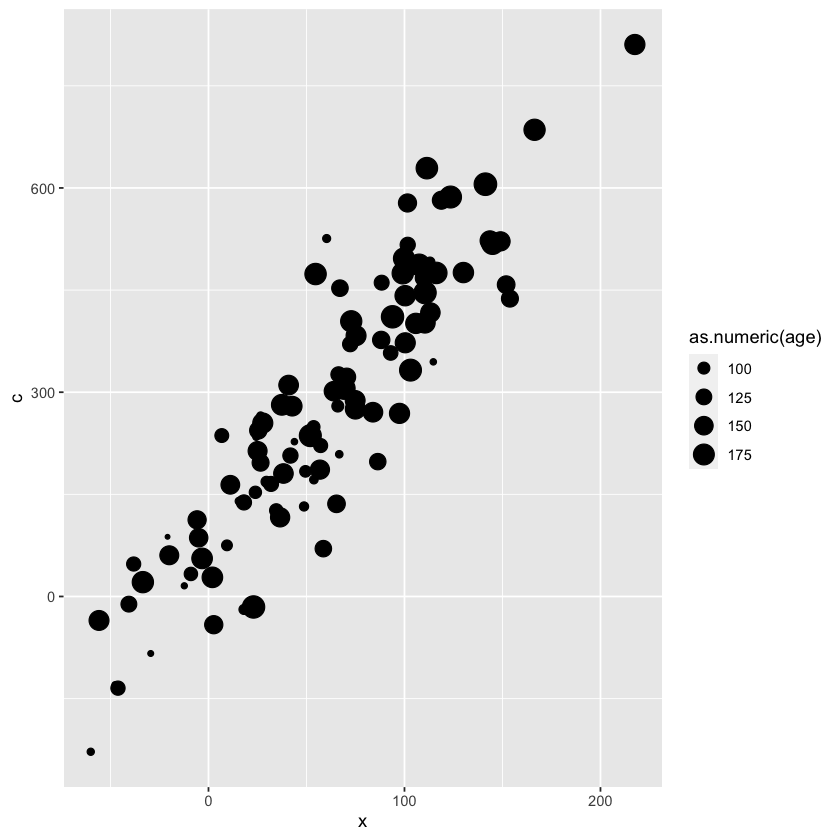

In [9]:
# WRITE YOUR CODE HERE
p <- dat %>%
  
  # Add a new column called 'c_bin': cut the initial 'comprehension' in bins
  # plot
  ggplot( aes(x=x, y=c,size=as.numeric(age)) ) +
  stat_summary(geom='point',fun=mean, aes(group=age))
  
p

# Mediation Analysis (3 points)

Load the `mediation` library.

In [11]:
install.packages("data.table", type = "binary")
install.packages("mediation", dependencies=TRUE)
require(mediation)
# ?mediate


  There is a binary version available (and will be installed) but the
  source version is later:
           binary source
data.table 1.13.6 1.14.0


The downloaded binary packages are in
	/var/folders/f7/v8c9zj6j5yd5x14zxr0v40wr0000gn/T//RtmpDmQuXu/downloaded_packages

The downloaded binary packages are in
	/var/folders/f7/v8c9zj6j5yd5x14zxr0v40wr0000gn/T//RtmpDmQuXu/downloaded_packages


Loading required package: mediation

Loading required package: MASS

Warning message:
“package ‘MASS’ was built under R version 3.6.2”

Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loading required package: mvtnorm

Warning message:
“package ‘mvtnorm’ was built under R version 3.6.2”
Loading required package: sandwich

Warning message:
“package ‘sandwich’ was built under R version 3.6.2”
mediation: Causal Mediation Analysis
Version: 4.5.0




Use the `mediate` function to determine whether `l` and `x` mediate the relationship between `age` and `c`. Use `summary()` to print the model results. *Hint: see tutorial 18*

In [53]:
# WRITE YOUR CODE HERE
fitM <- lm(x ~ age, data=dat) # checking relationship between mediator and age
summary(fitM)
fitY <- lm(c ~ x + age, data=dat) # checkign combined effect of mediator and age
summary(fitY)
fitMed <- mediate(fitM, fitY, treat="age", mediator="x")
summary(fitMed)


Call:
lm(formula = x ~ age, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-129.738  -32.918    3.844   31.148  142.147 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -28.5135    20.4150  -1.397    0.166    
age           0.6237     0.1421   4.391 2.86e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 50.41 on 98 degrees of freedom
Multiple R-squared:  0.1644,	Adjusted R-squared:  0.1558 
F-statistic: 19.28 on 1 and 98 DF,  p-value: 2.858e-05



Call:
lm(formula = c ~ x + age, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-200.147  -47.479    1.456   46.549  268.393 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  31.4738    34.7718   0.905    0.368    
x             3.1792     0.1704  18.661   <2e-16 ***
age           0.4010     0.2621   1.530    0.129    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 85.02 on 97 degrees of freedom
Multiple R-squared:  0.8218,	Adjusted R-squared:  0.8181 
F-statistic: 223.6 on 2 and 97 DF,  p-value: < 2.2e-16



Causal Mediation Analysis 

Quasi-Bayesian Confidence Intervals

               Estimate 95% CI Lower 95% CI Upper p-value    
ACME              2.011        1.124         2.98  <2e-16 ***
ADE               0.404       -0.117         0.91    0.12    
Total Effect      2.414        1.409         3.48  <2e-16 ***
Prop. Mediated    0.831        0.642         1.06  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Sample Size Used: 100 


Simulations: 1000 


How do you interpret these results? Why do you think the analysis yielded this result? 
> The second model shows that the effect of age on comprehension disappears and is not significant anymore. This indicates a good mediating effect by x. 
Finally the mediation results show a highly significant p-value for botm ACME and not significant for ADE. Hence, we can say that experience's mediation effect is strong and a poor direct effect of age on comprehension.

# Power Analysis via Simulation (4 points)

Now we're going to use our `simulate_data()` function to conduct a power analysis. The goal is to determine how many participants we would need in order to detect both the mediated and the direct effects in this data. 

*Note: We're going to pretend for the sake of simplicity that we don't have any control over the ages of the children we get (so ages are generated using `runif(sample_size, age_lo, age_hi)`, although of course this would be an unusual situation in reality.*

First, write a function, `run_analysis()`, that takes in simulated data and returns a vector containing the ACME and ADE estimates and p-values (these are the `d0`, `d0.p`, `z0`, and `z0.p` features of the mediated model object, e.g., `fitMed$d0.p`). Print this function's output for the data we simulated previously. 

In [59]:
# WRITE YOUR CODE HERE
run_analysis <- function(simulated_data) {
    fitM <- lm(x ~ age, data=simulated_data) # checking relationship between mediator and age
    fitY <- lm(c ~ x + age, data=simulated_data) # checkign combined effect of mediator and age
    fitMed <- mediate(fitM, fitY, treat="age", mediator="x")
    return(list(fitMed$d0,fitMed$d0.p,fitMed$z0,fitMed$z0.p))
}
out <- run_analysis(dat)


In [60]:
print(paste("ACME estimate:",out[[1]][1],", it's p-value: ",out[[2]][1]))
print(paste("ADE estimate:",out[[3]][1],", it's p-value: ",out[[4]][1]))

[1] "ACME estimate: 1.95967745050275 , it's p-value:  0"
[1] "ADE estimate: 0.406773025933819 , it's p-value:  0.14"


Next fill in the function `repeat_analysis()` below so that it simulates and analyzes data `num_simulations` times. Store the outputs from each simulation in the `simouts` matrix. Calculate and return the coverage across all the simulations run for both ACME and ADE.

In [64]:
repeat_analysis <- function(num_simulations, alpha, sample_size, age_lo, age_hi, 
        beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c) {
    # Initialize simouts matrix for storing each output from run_analysis()
    simouts <- matrix(rep(NA,num_simulations*4), nrow=num_simulations,ncol=4)
    
    # Start simulating
    for (i in 1:num_simulations) {
        # WRITE YOUR CODE HERE
        dat <- simulate_data(sample_size, age_lo, age_hi, beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c)
        simouts[i,] = unlist(run_analysis(dat))
    }
    # Calculate coverage for both ACME and ADE estimates using p-values in simouts
    ACME_cov =  mean(simouts[,2] <= alpha)# FILL THIS IN 
    ADE_cov = mean(simouts[,4] <= alpha) # FILL THIS IN

    return(list(ACME_cov = ACME_cov, ADE_cov = ADE_cov))
}

Now run the `repeat_analysis()` function using the same parameter settings as above, for 10 simulations, with an alpha criterion of 0.01. 

In [65]:
# WRITE YOUR CODE HERE
repeat_analysis(10,0.01,sample_size, age_lo, age_hi, beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c)

$ACME_cov
[1] 0.8

$ADE_cov
[1] 0.7

Finally, do the same thing (10 simulations, alpha criterion of 0.01) but for 5 different sample sizes: 50, 75, 100, 125, 150. You can do this using `map` (as in the tutorial), or a simple `for` loop, or by calculating each individually. Up to you! This should take around 3 minutes to run. 

In [66]:
sample_sizes <- c(50,75,100,125,150)
results <- data.frame(sample_size=sample_sizes,
          ACME_cov=rep(NA,length(sample_sizes)),
          ADE_cov=rep(NA,length(sample_sizes)))

start.time <- Sys.time()

# WRITE YOUR CODE HERE
out <- sample_sizes %>% map(~ repeat_analysis(10,0.01,.x, age_lo, age_hi, beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c))

end.time <- Sys.time()
print(paste("Run Time: ", end.time - start.time)) # This just prints how much time it took to run

[1] "Run Time:  1.72357351382573"


Print your results. 

In [67]:
# WRITE YOUR CODE HERE
results$ACME_cov <- lapply(out, `[[`, 1)
results$ADE_cov <- lapply(out, `[[`, 2)
results

sample_size,ACME_cov,ADE_cov
<dbl>,<list>,<list>
50,0.6,0.4
75,0.8,0.5
100,0.9,0.6
125,1,0.8
150,0.9,0.7


If this were a real power analysis, we'd want to run more simulations per sample size (to get a more precise estimate of power) and we may also want to test out some other values of the parameters we used to simulate our data. However, what would you conclude just based on the results above? 

> For all sample sizes, we have more p values below the significance level for ACME than ADE. This indicates more confidence for mediating effect than direct effect. This result is in line with the result we got for a single simulation as well. 

Given how we generated the data, why was the direct effect harder to detect than the mediated effect?
> Looking at the beta_ca and beta_cx values indicates that age causes a much smaller increases in comprehension, when compared to experience. Because our simulated data is modelled to have a very small direct effect, the direct effect is hard to detect in ADE responses. 

**DUE:** 5pm EST, April 15, 2021

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*